<a href="https://colab.research.google.com/github/shahid-exe/Diabetes-Prediction-through-Data-Analysis/blob/main/Diabetes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Quick look at the data
print(df.head())
print(df.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
# General information
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Column names
print(df.columns)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

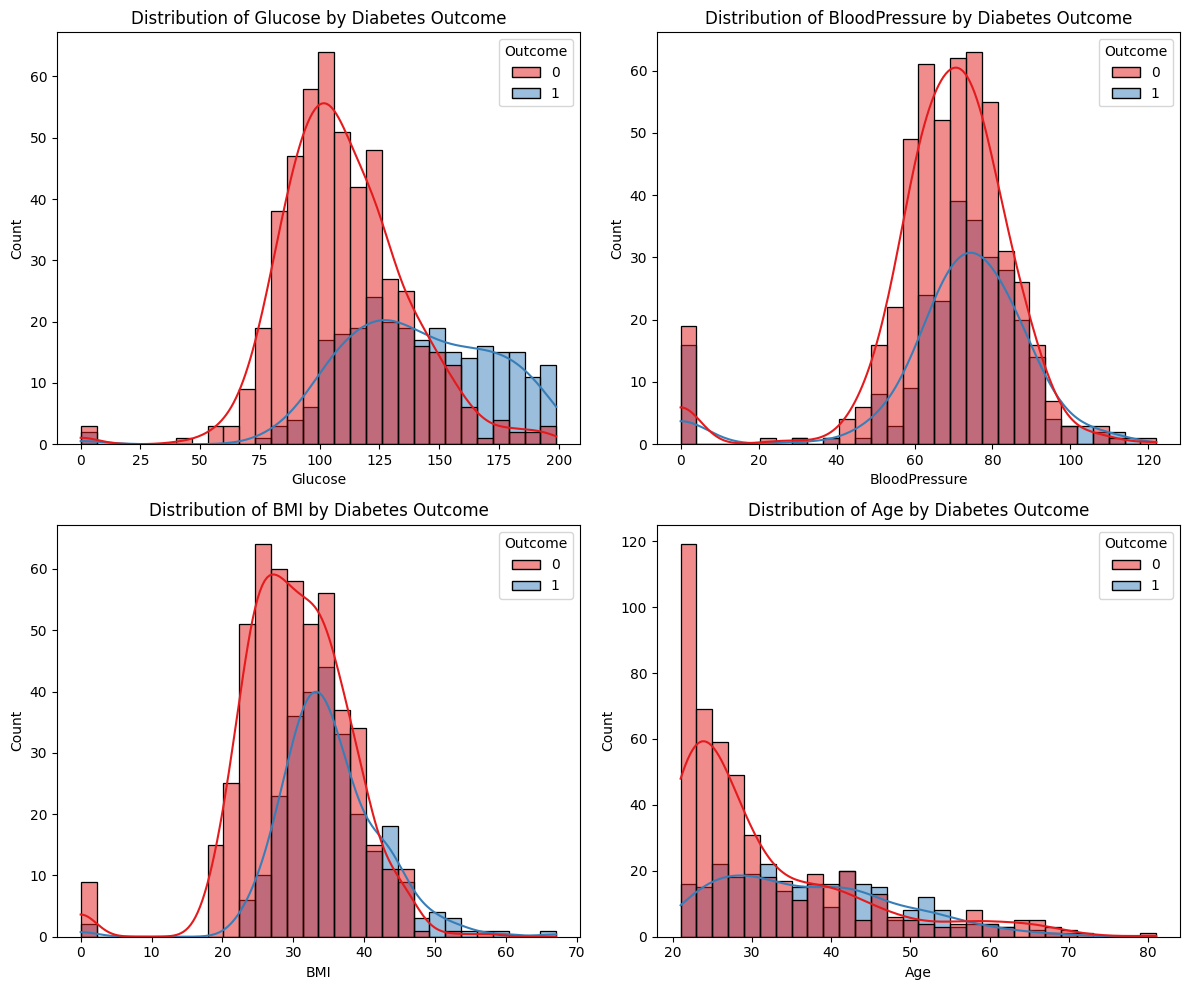

In [5]:
# Plot distribution of all features

features = ['Glucose', 'BloodPressure', 'BMI', 'Age']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=feature, hue="Outcome", kde=True, palette="Set1", bins=30)
    plt.title(f'Distribution of {feature} by Diabetes Outcome')

plt.tight_layout()
plt.show()



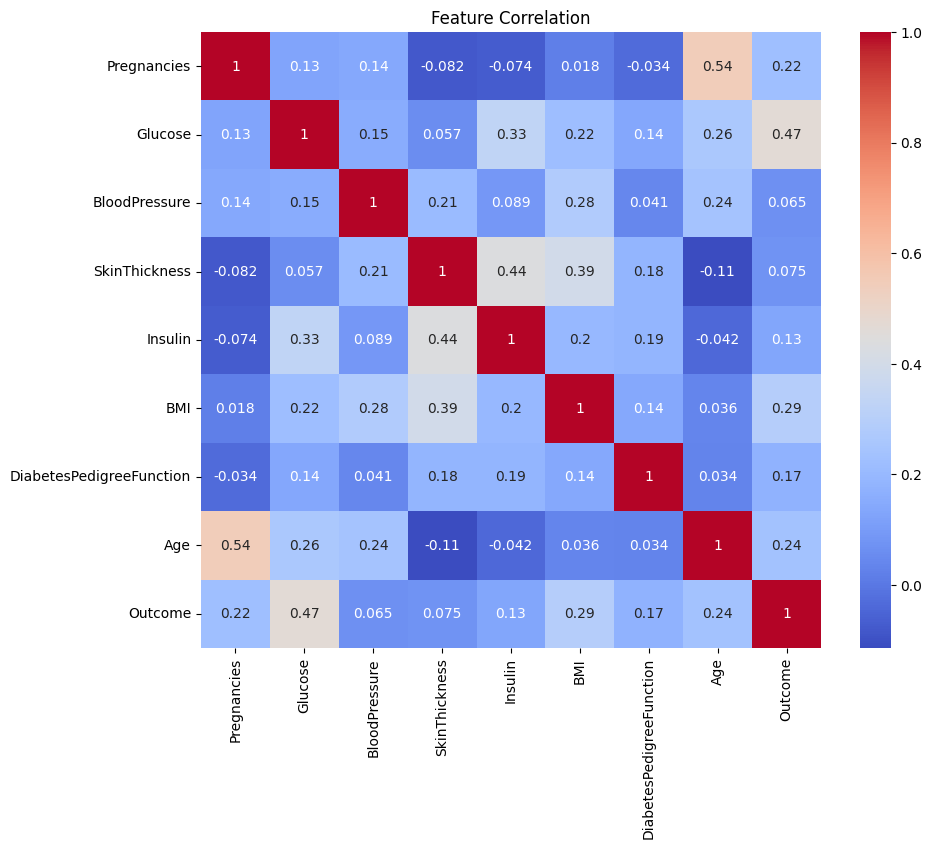

In [6]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [7]:
# Features where 0 is an invalid value
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

# Replace 0 with the mean of the column
for col in invalid_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

# Check again to make sure no zeros
print((df[invalid_cols] == 0).sum())


Glucose          0
BloodPressure    0
SkinThickness    0
BMI              0
Insulin          0
dtype: int64


<ipython-input-7-44ab3c2a3670>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [8]:
# Features and label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Train set: (614, 8)
Test set: (154, 8)


In [10]:
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [18]:
# Class weights in RandomForest
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model_weighted.fit(X_train, y_train)

# Evaluate the model
y_pred_rf_weighted = rf_model_weighted.predict(X_test)
print(f"Random Forest (Balanced) Accuracy: {accuracy_score(y_test, y_pred_rf_weighted):.2f}")


Random Forest (Balanced) Accuracy: 0.76


In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a Voting Classifier (majority voting)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('svm', svm),
    ('logreg', logreg)
], voting='hard')  # "hard" means majority voting

# Train the model
voting_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_voting = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.2f}")


Voting Classifier Accuracy: 0.76


In [14]:
# Import necessary libraries
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('logreg', logreg_model)],
    final_estimator=LogisticRegression()
)

# Combine models into a Voting Classifier
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('svm', svm_model)],
    voting='hard'  # hard voting based on majority class
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Train the voting model
voting_model.fit(X_train, y_train)

# Make predictions with both models
y_pred_stacking = stacking_model.predict(X_test)
y_pred_voting = voting_model.predict(X_test)

# Evaluate the performance of both models
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print(f"Stacking Classifier Accuracy: {accuracy_stacking:.2f}")
print(f"Voting Classifier Accuracy: {accuracy_voting:.2f}")


Stacking Classifier Accuracy: 0.77
Voting Classifier Accuracy: 0.75


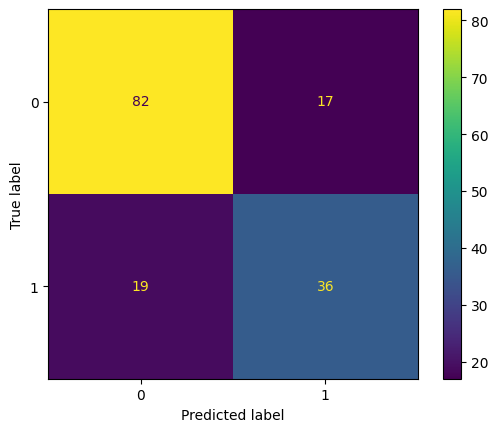

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for stacking model
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
disp_stacking = ConfusionMatrixDisplay(confusion_matrix=cm_stacking)
disp_stacking.plot()


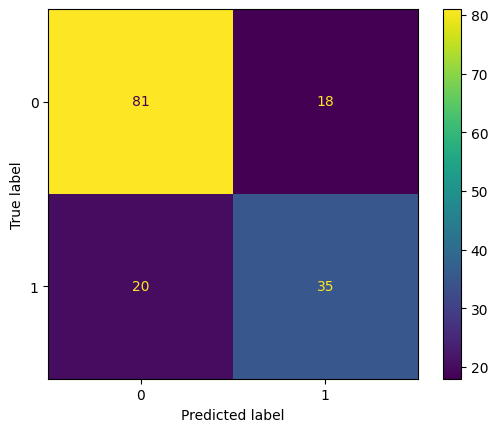

In [17]:
# Confusion matrix for voting model
cm_voting = confusion_matrix(y_test, y_pred_voting)
disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting)
disp_voting.plot()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


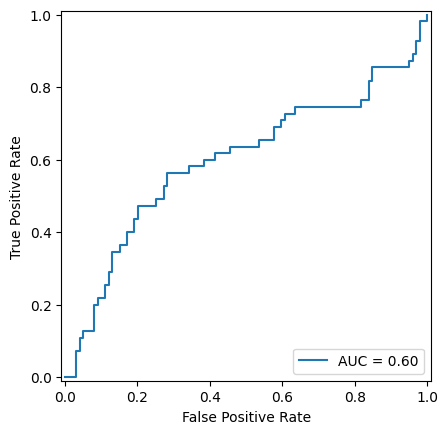

In [19]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Predict probabilities
X_test_scaled = scaler.transform(X_test)
y_score_stacking = stacking_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score_stacking)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()


In [20]:
from sklearn.metrics import classification_report

# Classification report for stacking model
print(classification_report(y_test, y_pred_stacking))

# Classification report for voting model
print(classification_report(y_test, y_pred_voting))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [22]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
                               param_distributions=param_grid_rf,
                               n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

X_train_scaled = scaler.fit_transform(X_train)
# Fit on training data
rf_random.fit(X_train_scaled, y_train)

# Best Random Forest model
best_rf = rf_random.best_estimator_
print(best_rf)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=300, random_state=42)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Random Forest Accuracy: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81        99
           1       0.65      0.75      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



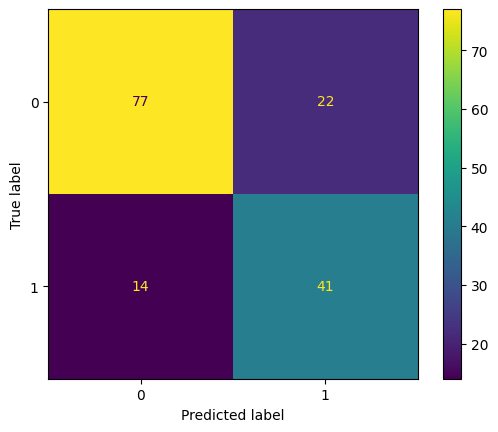

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Data preprocessing (handling invalid values)
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for col in invalid_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].mean())  # Updated to avoid FutureWarning

# Features and label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_grid_rf,
    n_iter=50,  # Increased iterations for better exploration
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all cores
)

rf_random.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_rf = rf_random.best_estimator_
print("Best Random Forest Parameters:", rf_random.best_params_)

# Train the best model
best_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<ipython-input-28-6a319de15d74>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


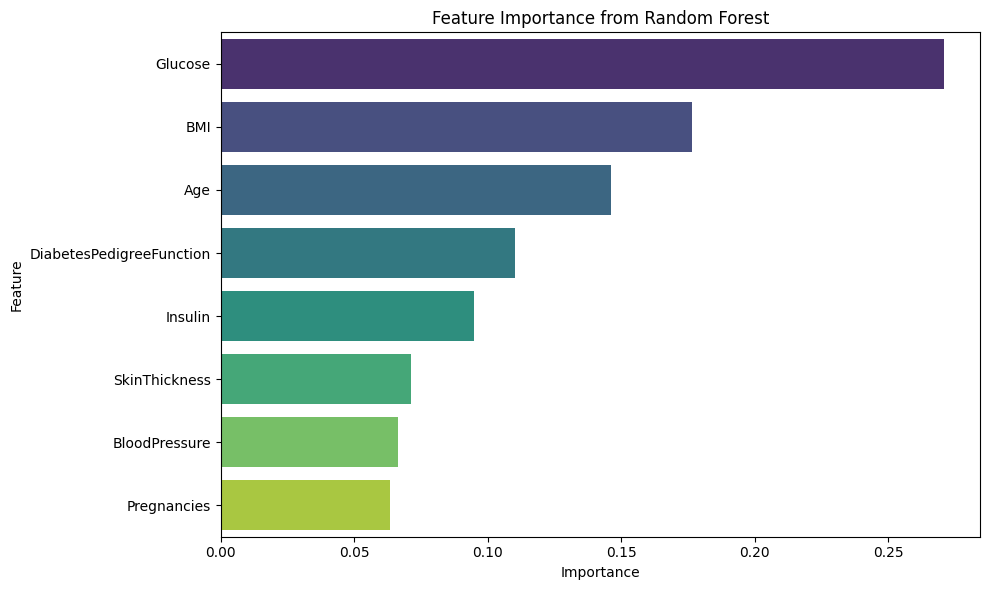

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


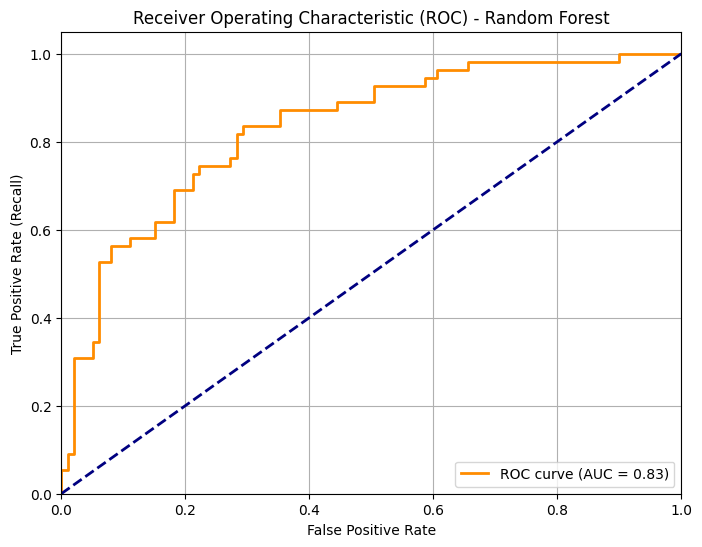

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = best_rf.predict_proba(X_test_scaled)[:, 1]   # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
